In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df= pd.read_csv("/home/yadasa/Desktop/InsuranceDataAnalysis/scripts/preprocessed_data.csv", low_memory=False)

histograms for numerical column/


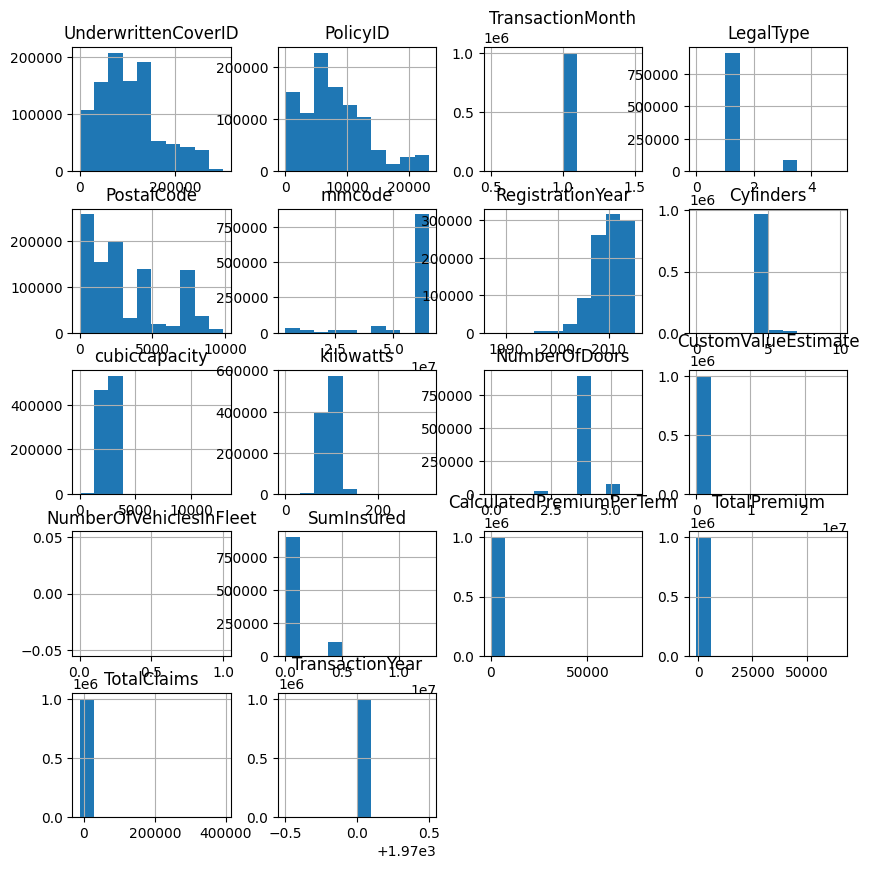

In [3]:
# Plot histograms for numerical columns

print("histograms for numerical column/")
df.hist(figsize=(10, 10))
plt.show()

# # Plot bar charts for categorical columns
# categorical_cols = df.select_dtypes(include='object').columns
# for col in categorical_cols:
#     value_counts = df[col].value_counts()
#     plt.figure(figsize=(8, 6))
#     ax = value_counts.plot(kind='bar')
#     ax.set_title(col)
#     ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
#     plt.show()



Correlation matrix:
                          UnderwrittenCoverID  PolicyID  TransactionMonth  \
UnderwrittenCoverID                  1.000000  0.916324               NaN   
PolicyID                             0.916324  1.000000               NaN   
TransactionMonth                          NaN       NaN               NaN   
LegalType                           -0.121432 -0.138283               NaN   
PostalCode                          -0.018206 -0.034186               NaN   
mmcode                               0.083292  0.074407               NaN   
RegistrationYear                     0.065886  0.067192               NaN   
Cylinders                           -0.026904 -0.028543               NaN   
cubiccapacity                        0.084873  0.088058               NaN   
kilowatts                           -0.038604 -0.032189               NaN   
NumberOfDoors                       -0.023776 -0.031429               NaN   
CustomValueEstimate                  0.003237  0.002558 

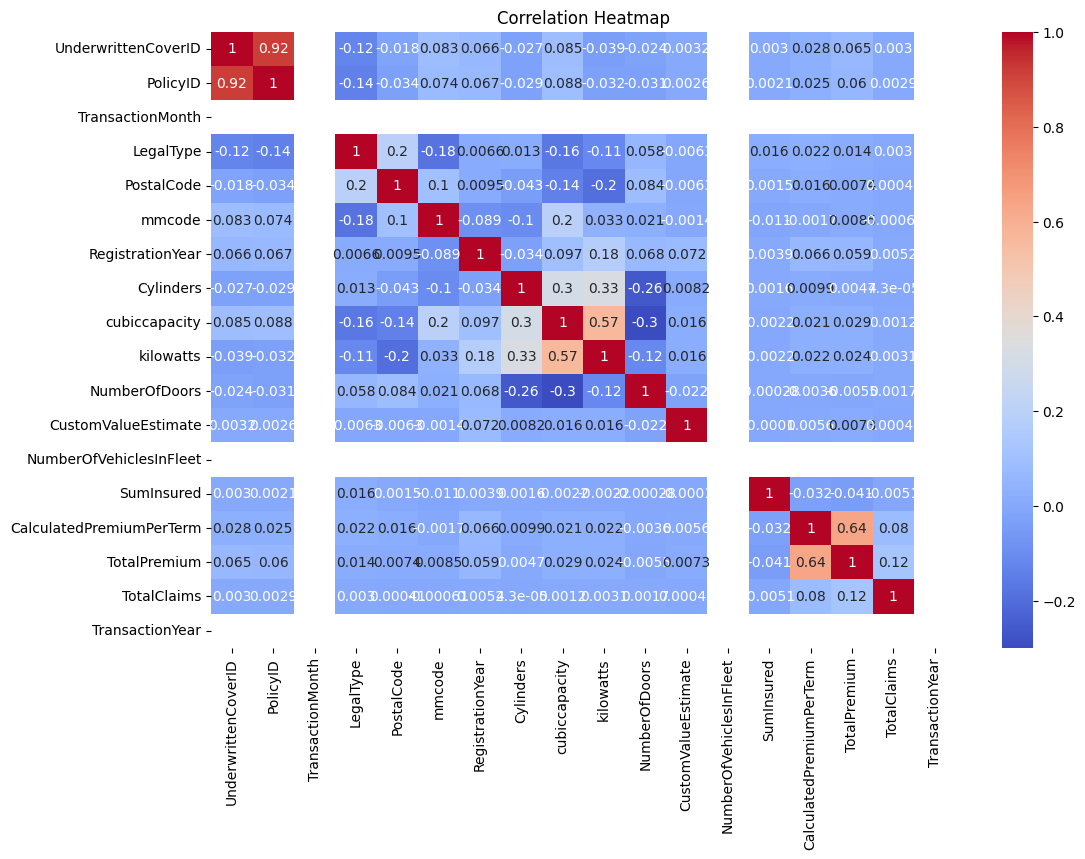

In [4]:
# Identify columns with non-numeric values
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

# Exclude non-numeric columns from the DataFrame
numeric_df = df.drop(columns=non_numeric_cols)

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation matrix:")
print(corr_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [4]:
summary_stats = df[['TotalPremium', 'TotalClaims']].describe()
print(summary_stats)

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05


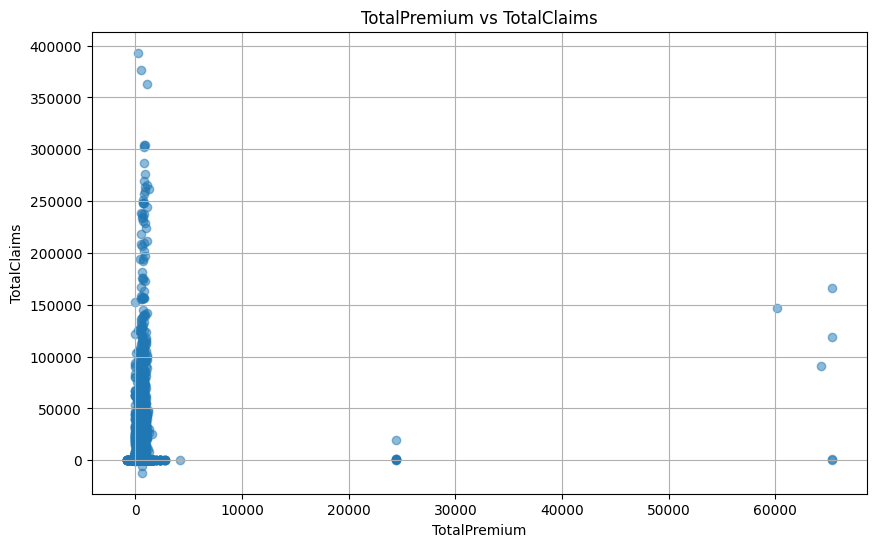

In [5]:

# Scatter plot of TotalPremium against TotalClaims
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalPremium'], df['TotalClaims'], alpha=0.5)
plt.title('TotalPremium vs TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.grid(True)
plt.show()

In [6]:
# Calculate correlation matrix
corr_matrix = df[['TotalPremium', 'TotalClaims']].corr()

# Display correlation matrix
print("Correlation matrix:")
print(corr_matrix)


Correlation matrix:
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


# The correlation matrix shows the correlation coefficients between 'TotalPremium' and 'TotalClaims' columns:

The correlation coefficient between 'TotalPremium' and 'TotalClaims' is approximately 0.121588, indicating a weak positive correlation between these two variables.
This means that there is a slight tendency for 'TotalPremium' and 'TotalClaims' to increase together, but the relationship is not very strong.

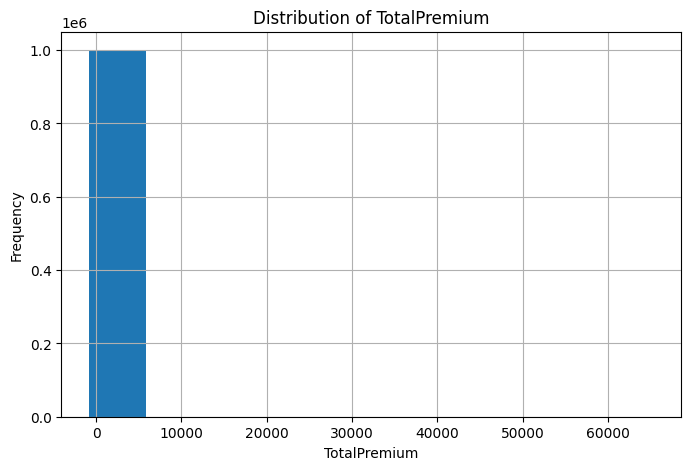

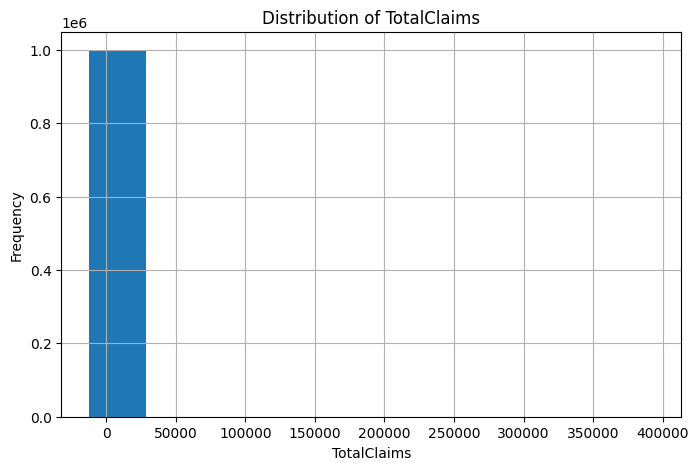

In [7]:
# Visualize distribution of 'TotalPremium' using histogram
df['TotalPremium'].hist(figsize=(8, 5))
plt.title('Distribution of TotalPremium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of 'TotalClaims' using histogram
df['TotalClaims'].hist(figsize=(8, 5))
plt.title('Distribution of TotalClaims')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.show()


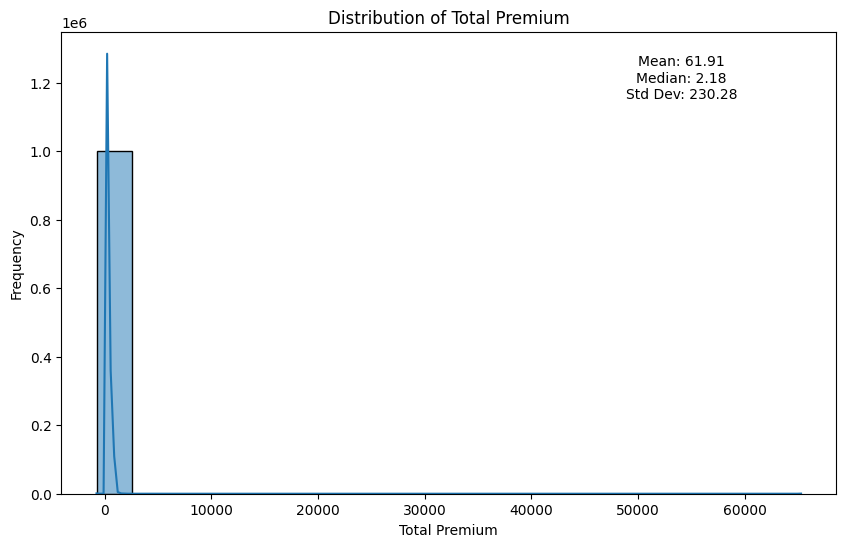

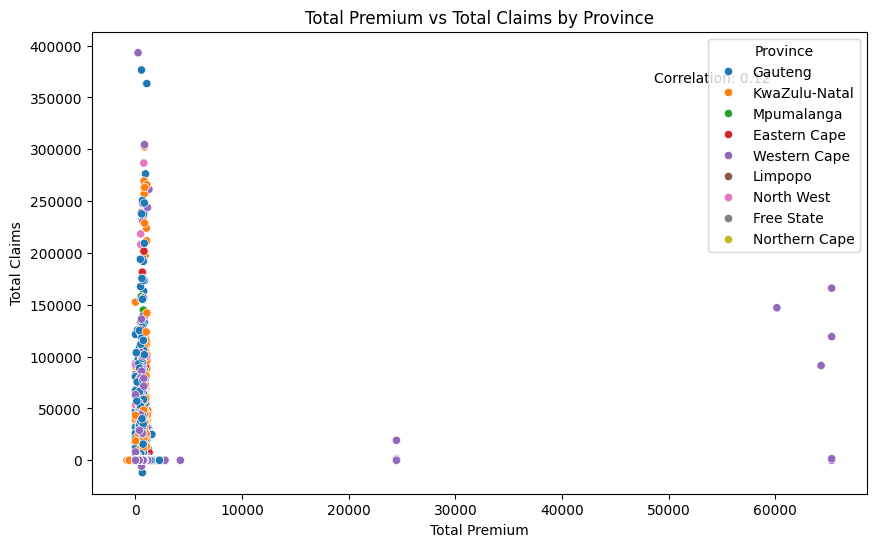

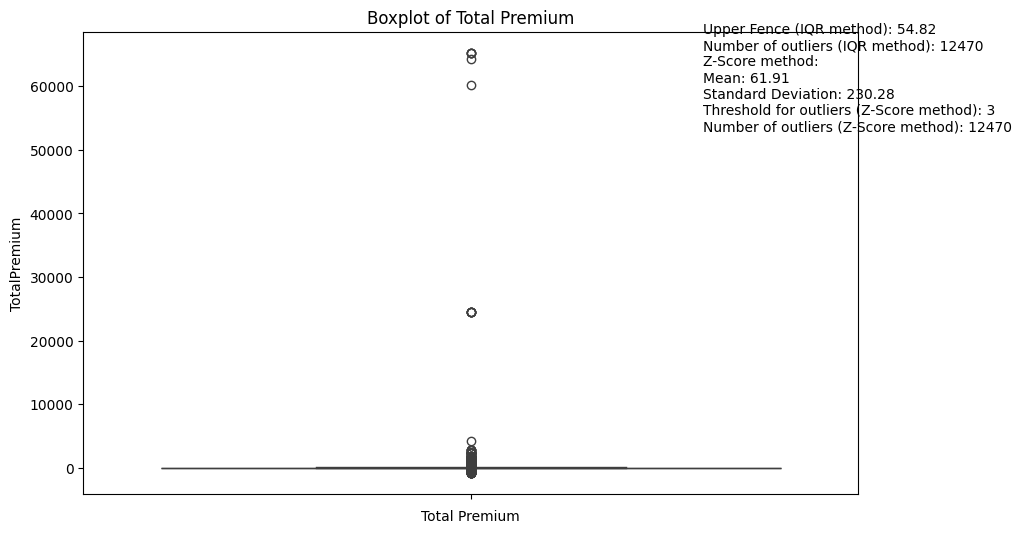

Summary statistics:
count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64

Outliers identified using Z-Score method:
        UnderwrittenCoverID  PolicyID  TransactionMonth  IsVATRegistered  \
430                  119591      8672                 1            False   
431                  119591      8672                 1            False   
432                  119591      8672                 1            False   
433                  119591      8672                 1            False   
499                  129101     11030                 1            False   
...                     ...       ...               ...              ...   
999233                20062      1095                 1            False   
999235                46257      4049                 1            False   
999592               167335     14399     

In [8]:
# Conduct univariate analysis - Histogram with printed summary
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], bins=20, kde=True)
plt.title('Distribution of Total Premium')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')

# Print summary statistics
plt.text(0.8, 0.9, f"Mean: {df['TotalPremium'].mean():.2f}\nMedian: {df['TotalPremium'].median():.2f}\nStd Dev: {df['TotalPremium'].std():.2f}",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

# Conduct bivariate/multivariate analysis - Scatter plot with printed summary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='Province')
plt.title('Total Premium vs Total Claims by Province')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Province')

# Print summary statistics
plt.text(0.8, 0.9, f"Correlation: {df['TotalPremium'].corr(df['TotalClaims']):.2f}",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()



# Calculate z-scores
z_scores = (df['TotalPremium'] - df['TotalPremium'].mean()) / df['TotalPremium'].std()

# Define threshold for outliers (e.g., z-score > 3)
threshold = 3

# Identify outliers
outliers = df[np.abs(z_scores) > threshold]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['TotalPremium'])
plt.title('Boxplot of Total Premium')
plt.xlabel('Total Premium')

# Print summary statistics
plt.text(0.8, 0.9, f"Upper Fence (IQR method): {df['TotalPremium'].quantile(0.75) + 1.5*(df['TotalPremium'].quantile(0.75) - df['TotalPremium'].quantile(0.25)):.2f}\n"
                   f"Number of outliers (IQR method): {len(outliers)}\n"
                   f"Z-Score method:\n"
                   f"Mean: {df['TotalPremium'].mean():.2f}\n"
                   f"Standard Deviation: {df['TotalPremium'].std():.2f}\n"
                   f"Threshold for outliers (Z-Score method): {threshold}\n"
                   f"Number of outliers (Z-Score method): {len(outliers)}",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

# Insights
print("Summary statistics:")
print(df['TotalPremium'].describe())
print("\nOutliers identified using Z-Score method:")
print(outliers)


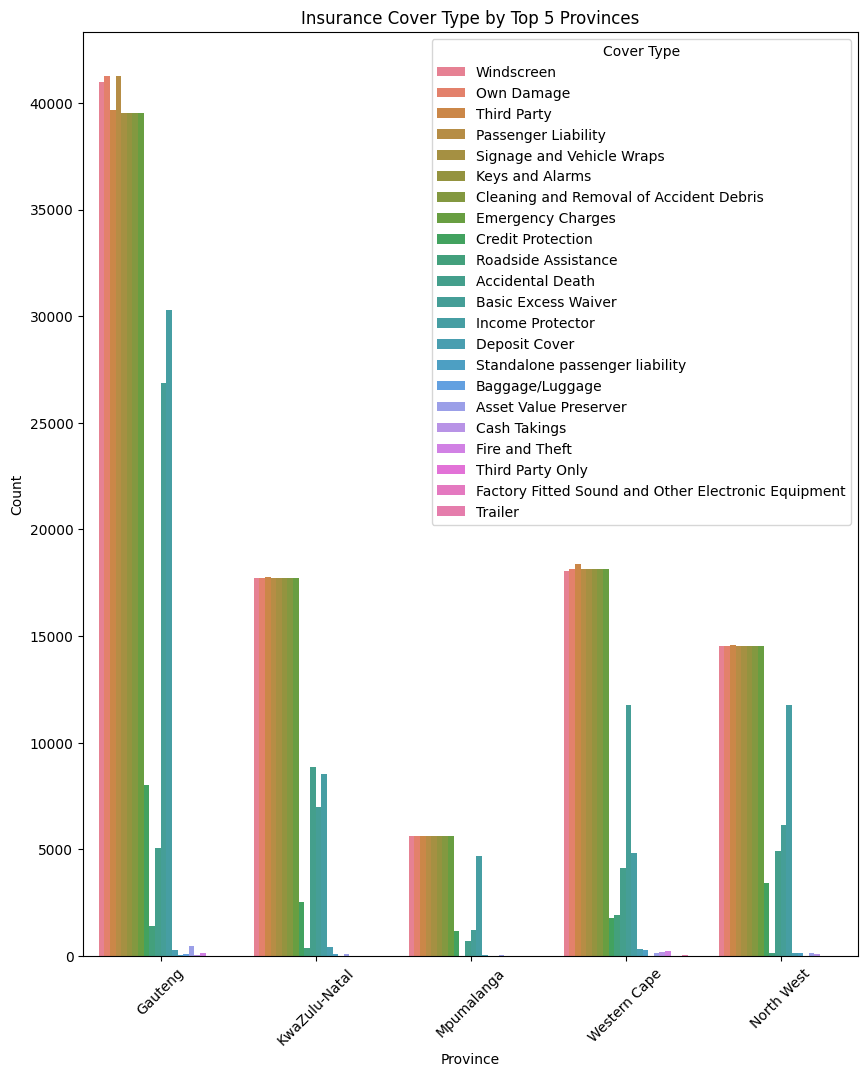

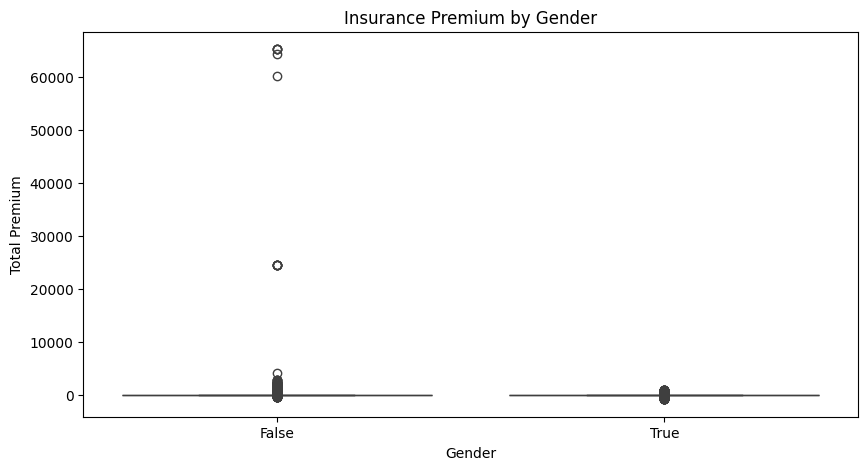

Index(['Gauteng', 'Western Cape', 'KwaZulu-Natal', 'North West', 'Mpumalanga'], dtype='object', name='Province')


In [9]:
# Example: Visualize trends over geography - Top 5 provinces
top_5_province = df['Province'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 12))
sns.countplot(data=df[df['Province'].isin(top_5_province)], x='Province', hue='CoverType')
plt.title('Insurance Cover Type by Top 5 Provinces')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Cover Type')
plt.xticks(rotation=45)
plt.show()

# Output: A bar plot showing the count of different cover types across the top 5 provinces.

# Example: Compare insurance premium by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender_Male', y='TotalPremium')
plt.title('Insurance Premium by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Premium')
plt.show()


print(top_5_province)
# Output: A boxplot comparing the distribution of total premium between male and female policyholders.


/tmp/ipykernel_72082/2153239795.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


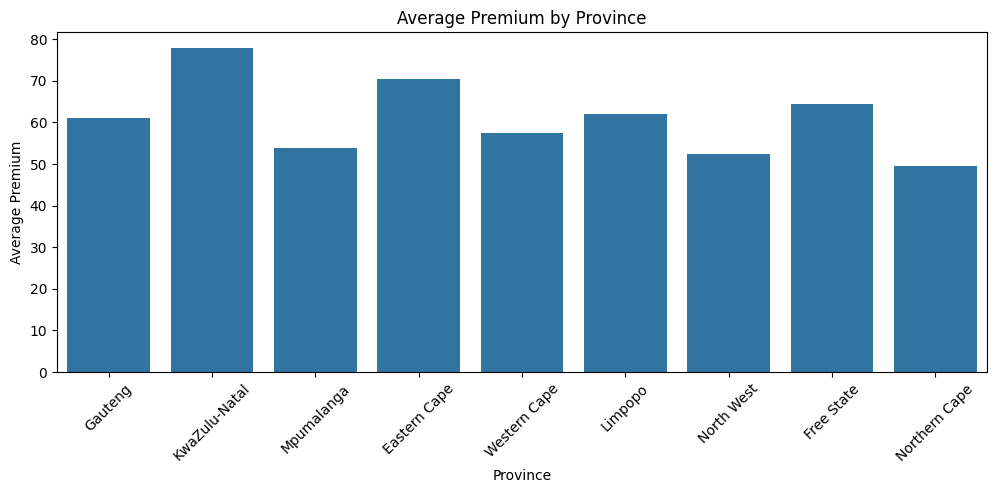

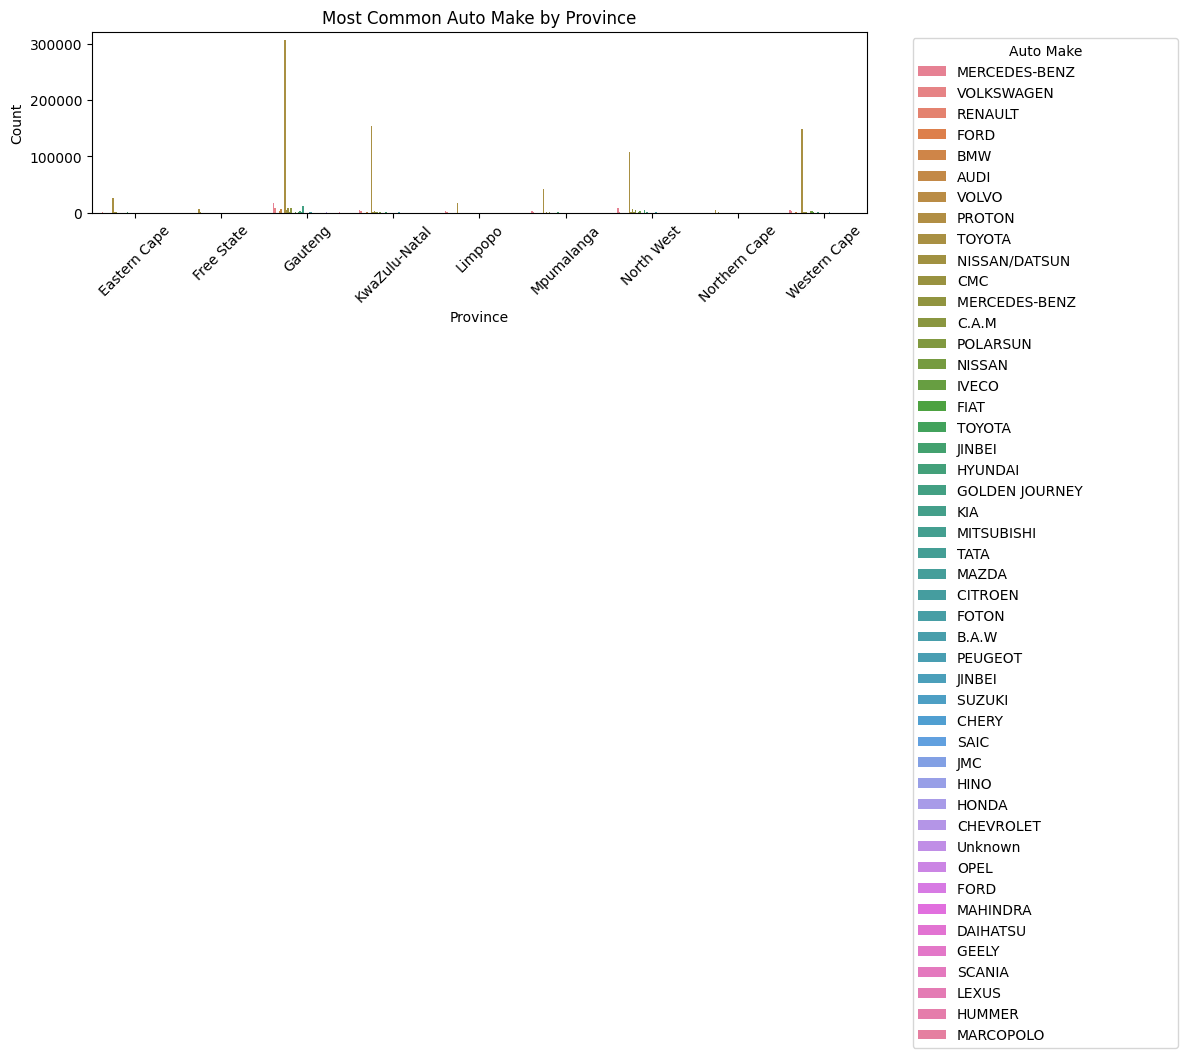

In [10]:
# Visualize trends over geography
plt.figure(figsize=(12, 15))  # Increase figure size to accommodate description

# # Subplot 1: Insurance Cover Type by Province
# plt.subplot(3, 1, 1)  # Adjust subplot layout to 3 rows, 1 column
# sns.countplot(data=df, x='Province', hue='CoverType')
# plt.title('Insurance Cover Type by Province')
# plt.xlabel('Province')
# plt.ylabel('Count')
# plt.legend(title='Cover Type')
# plt.xticks(rotation=45)

# Subplot 2: Average Premium by Province
plt.subplot(3, 1, 2)  # Move this subplot to the second row
sns.barplot(data=df, x='Province', y='TotalPremium', errorbar=None)
plt.title('Average Premium by Province')
plt.xlabel('Province')
plt.ylabel('Average Premium')
plt.xticks(rotation=45)

# Adjust figure size to give more space
plt.figure(figsize=(10, 8))

# Subplot 3: Most Common Auto Make by Province
plt.subplot(3, 1, 3)  # Move this subplot to the third row
common_auto_make = df.groupby('Province')['make'].agg(lambda x: x.value_counts().index[0])
sns.countplot(data=df, x='Province', hue='make', order=common_auto_make.index)
plt.title('Most Common Auto Make by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Move legend outside the plot
plt.legend(title='Auto Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  
plt.show()



In [18]:
geo_analysis = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean().reset_index()

In [19]:
geo_analysis

,PostalCode,TotalPremium,TotalClaims
0,1,51.120638,57.589092
1,2,40.901700,41.589582
2,4,113.947737,0.000000
3,5,61.653626,207.378816
4,6,50.591432,19.610447
...,...,...,...
883,9781,54.553324,139.499604
884,9830,131.760895,0.000000
885,9868,116.042377,0.000000
886,9869,44.774438,1.580807


In [15]:
# Calculate the total premium and total claims
total_premium = df['TotalPremium'].sum()
total_claims = df['TotalClaims'].sum()

# Group by PostalCode and calculate mean total premium and total claims
geo_analysis = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean().reset_index()

# Calculate the contribution of each postal code to the total premium and total claims
geo_analysis['PremiumContribution'] = geo_analysis['TotalPremium'] / total_premium
geo_analysis['ClaimsContribution'] = geo_analysis['TotalClaims'] / total_claims

# Filter out postal codes where the contribution exceeds 25%
high_contributing_postal_codes = geo_analysis[(geo_analysis['PremiumContribution'] > 0.02) | (geo_analysis['ClaimsContribution'] > 0.02)]

print(high_contributing_postal_codes)



Empty DataFrame
Columns: [PostalCode, TotalPremium, TotalClaims, PremiumContribution, ClaimsContribution]
Index: []


In [16]:
print (total_premium)

61911562.69643226


In [17]:
print(total_claims)

64867546.17070174


Total Premium: $61,911,562.70
Total Claims: $64,867,546.17

Claims Exceed Premiums: The total claims amount ($64,867,546.17) exceeds the total premium amount ($61,911,562.70). This indicates that the insurance company has paid out more in claims than it has received in premiums during the analyzed period.

Financial Loss: The insurance company is experiencing a financial loss due to the higher total claims compared to total premiums. This loss may impact the company's profitability and financial stability.

Risk Assessment: The discrepancy between total premiums and total claims suggests that the insurance company may need to reassess its risk management strategies. It may consider adjusting premium rates, revising coverage policies, or implementing stricter underwriting criteria to mitigate future losses.

Claims Management: Analyzing the types and frequency of claims contributing to the total claims amount can help the company identify areas where claims can be reduced or managed more effectively. This could involve improving safety measures, enhancing customer education on policy coverage, or implementing fraud detection measures.

Business Strategy: The company may need to review its business strategy to address the imbalance between premiums and claims. This could include diversifying its product offerings, targeting new markets, or enhancing customer retention strategies to increase premium revenue and mitigate claims losses.

Overall, these insights highlight the importance of closely monitoring the relationship between premiums and claims to ensure the long-term financial sustainability of the insurance company. Adjustments in risk management, claims handling, and business strategy may be necessary to address the current imbalance and improve overall performance.

Strong Positive Correlation:

There is a strong positive correlation between UnderwrittenCoverID and PolicyID (0.92), indicating that these two variables are highly correlated. This correlation is expected since UnderwrittenCoverID likely relates to specific policies identified by PolicyID.
Weak Correlation:

Most other correlations appear to be relatively weak (close to 0), indicating little linear relationship between the variables. For example, there is weak correlation between LegalType and other variables like PostalCode, mmcode, etc.
Multicollinearity:

There are some variables with high positive correlation coefficients (> 0.9), such as UnderwrittenCoverID and PolicyID. This suggests potential multicollinearity between these variables, which could impact model performance in predictive modeling tasks.
Null Correlation:

TransactionMonth has null correlation coefficients with other variables, indicating that it doesn't have a linear relationship with any other numeric variables in the dataset.

Recommendations:

Address Multicollinearity: Evaluate whether variables with high correlation coefficients are redundant or provide unique information. If redundant, consider removing one of the variables to reduce multicollinearity.
Feature Selection: Use correlation analysis to identify variables that are strongly correlated with the target variable (e.g., TotalClaims) for feature selection in predictive modeling.
Further Investigation: Investigate variables with weak correlations to determine if they are relevant for analysis or if there are data quality issues.
Domain Knowledge: Consider domain knowledge and context to interpret correlations effectively and make informed decisions

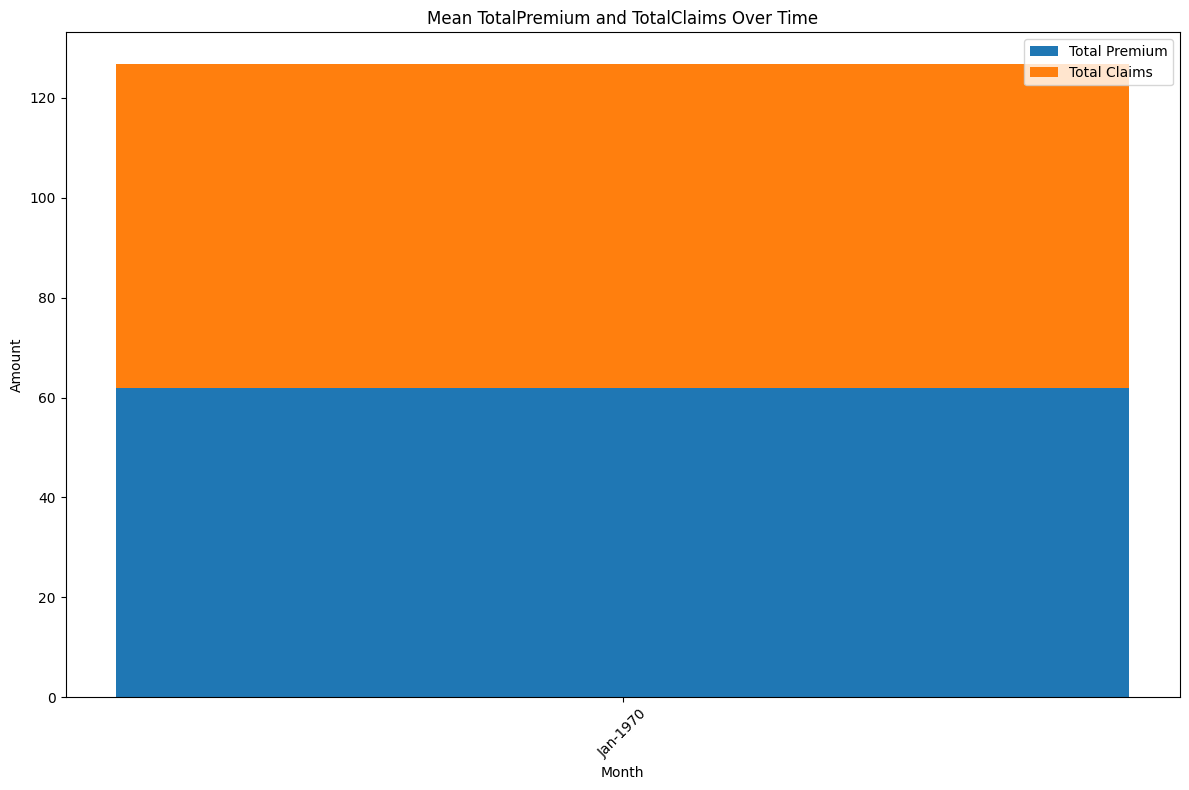

In [20]:
import calendar

# Group data by TransactionYear and TransactionMonth and calculate mean TotalPremium and TotalClaims
time_series_analysis = df.groupby(['TransactionYear', 'TransactionMonth'])[['TotalPremium', 'TotalClaims']].mean().reset_index()

# Map integer month values to month names
month_names = [calendar.month_abbr[month] for month in time_series_analysis['TransactionMonth']]

# Visualize time series trends using a bar graph with correct month names
plt.figure(figsize=(12, 8))
plt.bar(range(len(time_series_analysis)), time_series_analysis['TotalPremium'], label='Total Premium')
plt.bar(range(len(time_series_analysis)), time_series_analysis['TotalClaims'], bottom=time_series_analysis['TotalPremium'], label='Total Claims')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Mean TotalPremium and TotalClaims Over Time')
plt.xticks(range(len(time_series_analysis)), [f"{month}-{year}" for month, year in zip(month_names, time_series_analysis['TransactionYear'])], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Check for missing or zero values in 'TotalPremium' before calculating the ratio
missing_or_zero_premium = df['TotalPremium'].isnull() | (df['TotalPremium'] == 0)

# Calculate the ratio of TotalClaims to TotalPremium, handling missing or zero values
df['Claim_Premium_Ratio'] = np.where(missing_or_zero_premium, np.nan, df['TotalClaims'] / df['TotalPremium'])

# Print the distribution of Claim_Premium_Ratio
ratio_counts = df['Claim_Premium_Ratio'].value_counts().sort_index()
print("Distribution of Claim-Premium Ratio:")
print(ratio_counts)

Distribution of Claim-Premium Ratio:
Claim_Premium_Ratio
-18.700122           1
-9.973686            1
 0.000000       615821
 0.023098            1
 0.034732            2
                 ...  
 1475.828045         1
 1485.751642         1
 1614.087195         1
 2336.981815         1
 2553.600000         1
Name: count, Length: 1759, dtype: int64


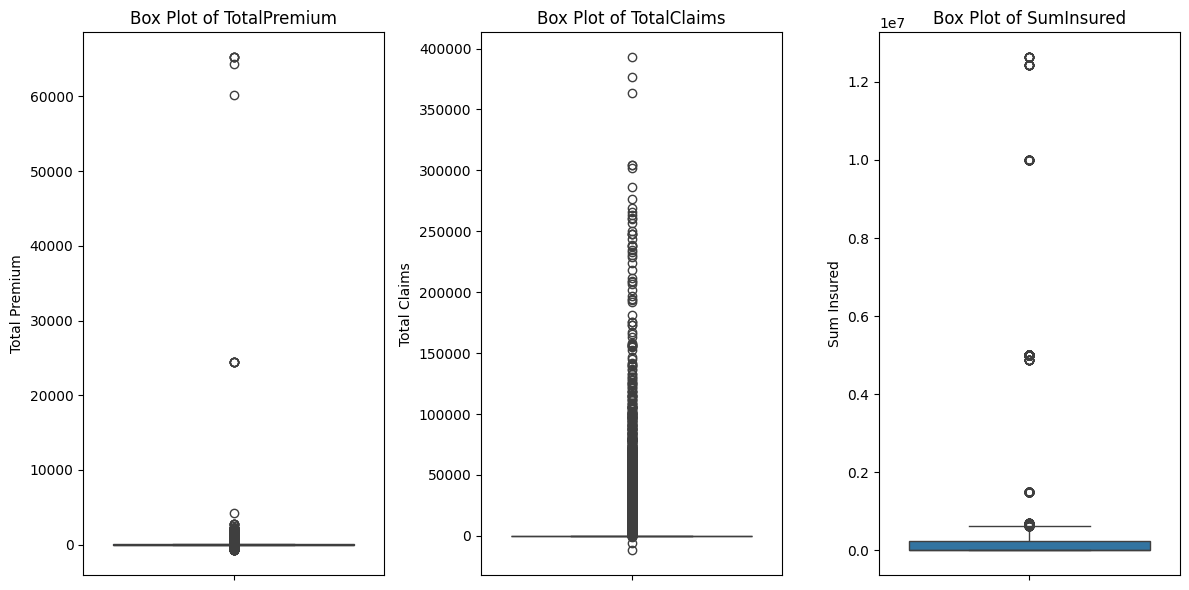

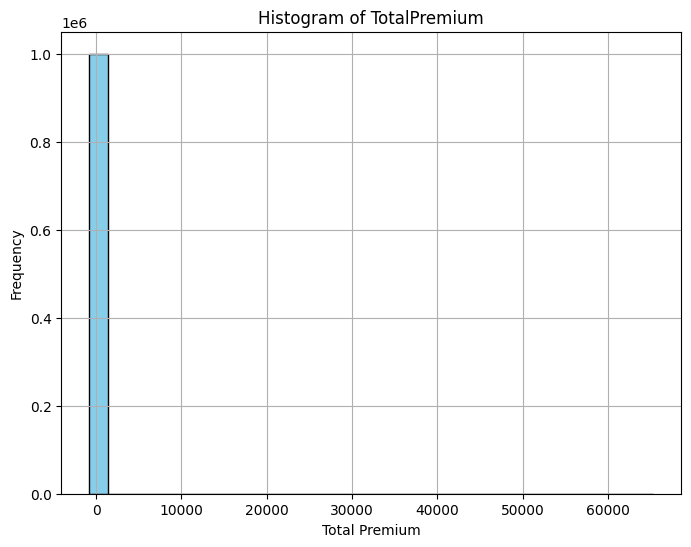

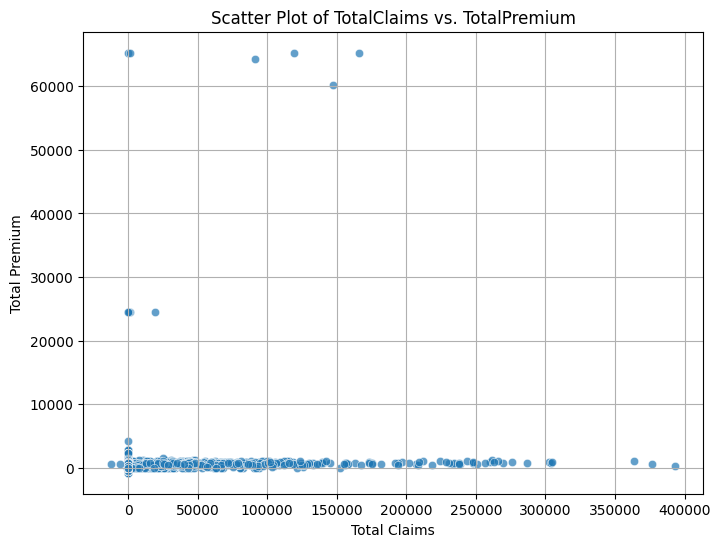

/tmp/ipykernel_72082/3046026802.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CoverType', palette='Set2')


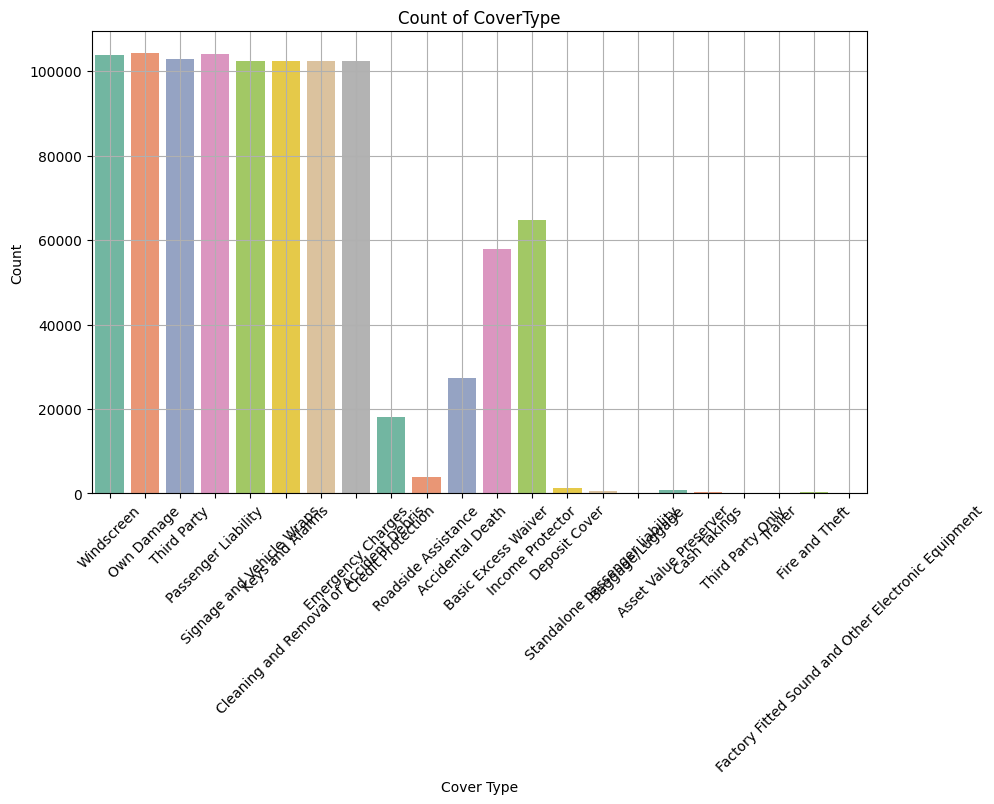

In [22]:
# Outlier Detection using Box Plots
plt.figure(figsize=(12, 6))

# Box plot for TotalPremium
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='TotalPremium')
plt.title('Box Plot of TotalPremium')
plt.ylabel('Total Premium')

# Box plot for TotalClaims
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='TotalClaims')
plt.title('Box Plot of TotalClaims')
plt.ylabel('Total Claims')

# Box plot for SumInsured
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='SumInsured')
plt.title('Box Plot of SumInsured')
plt.ylabel('Sum Insured')

plt.tight_layout()
plt.show()

# Visualization: Produce Creative Plots
# Plot 1: Histogram of TotalPremium
plt.figure(figsize=(8, 6))
plt.hist(df['TotalPremium'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of TotalPremium')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Scatter plot of TotalClaims vs. TotalPremium
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TotalClaims', y='TotalPremium', alpha=0.7)
plt.title('Scatter Plot of TotalClaims vs. TotalPremium')
plt.xlabel('Total Claims')
plt.ylabel('Total Premium')
plt.grid(True)
plt.show()

# Plot 3: Bar plot of CoverType counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CoverType', palette='Set2')
plt.title('Count of CoverType')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [5]:
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth              int64
IsVATRegistered                bool
Citizenship                  object
LegalType                     int64
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               float64
VehicleIntroDate            

In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,TransactionYear,Gender_Male,Gender_Not specified,Gender_Unknown
0,145249,12827,1,True,,0,Mr,English,First National Bank,Current account,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,1970,False,True,False
1,145249,12827,1,True,,0,Mr,English,First National Bank,Current account,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,1970,False,True,False
2,145249,12827,1,True,,0,Mr,English,First National Bank,Current account,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,1970,False,True,False
3,145255,12827,1,True,,0,Mr,English,First National Bank,Current account,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,1970,False,True,False
4,145255,12827,1,True,,0,Mr,English,First National Bank,Current account,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,1970,False,True,False
